# Régression linéaire multiple

In [339]:
import pandas as pd 
import numpy as np

from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

import seaborn as sns
from matplotlib import pyplot as plt

## Création du dataset

In [340]:
#on importe un dataset contenant les caractéristiques chimiques et/ou physiques de vins. L'objectif est de créer un modèle permettant de prédire la qualité du vin selon ces caractéristiques
df = pd.read_csv("../Data/winequality-white.csv", delimiter=";")

#on enleve les lignes nulles
df = df.dropna()
print(df.head)

listeEntetes = list(df.columns)
#print(listeEntetes)

print(df[:1])
x = []
for i in range(len(df)):
    ligne = []
    for j in range(len(listeEntetes)-1):
        ligne.append(df.iloc[i,j])
    x.append(ligne)

#on convertit la liste des features en un vecteur, et on récupère les labels du dataset qu'on stocke dans un vecteur
x = np.array(x)
y = np.array(df[listeEntetes[len(listeEntetes)-1]])

y=y.reshape(y.shape[0], 1)
print(x.shape)
print(y.shape)
print(x)
print(y)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

In [341]:
"""# Représentation graphique du modèle en 3d 
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='12d')
ax.scatter(x[:,0], x[:,1], y, c='b', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(5, 180)
plt.show()
"""
#on représente chaque feature dans un graphique en 2d

"# Représentation graphique du modèle en 3d \nfig = plt.figure(figsize=(8,8))\n\nax = fig.add_subplot(111, projection='12d')\nax.scatter(x[:,0], x[:,1], y, c='b', marker='o')\n\nax.set_xlabel('X')\nax.set_ylabel('Y')\nax.set_zlabel('Z')\n\nax.view_init(5, 180)\nplt.show()\n"

## Modèle

In [342]:
#notre modèle qui calcule les y_predictions en fonction de x
def model(X, theta):
    return np.dot(X, theta)

## Fonction de coûts

In [343]:
def cout(X, y, theta):
    return (1/(2*len(y))) * np.sum((model(X, theta) - y)**2)


## Descente de Gradient (DG)

In [344]:
#Maintenant, on utilise la descente de gradients pour minimiser la fonction F et trouver les paramètres a, b optimaux
def gradient(X, y, theta):
    return (1/(2*len(y))) * np.dot(X.T, (model(X, theta) - y))

def descenteGradient(X, y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for iteration in range(0, n_iterations):
        theta = theta - learning_rate*gradient(X, y, theta)
        histCout[iteration]= cout(X,y,theta)

    return theta, histCout

def coefDet(y, y_predictions):
    u=((y-y_predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

## Prédiction du modèle à l'aide d'une régression multiple

In [345]:
#on va utiliser une régression linéaire multiple, avec n paramètres 
print(x.shape)
theta = np.random.randn(x.shape[1]+1,1)
print(theta.shape)
print(theta)

(4898, 11)
(12, 1)
[[-0.45340874]
 [-0.9304276 ]
 [-1.22086416]
 [-0.09755482]
 [ 1.4409784 ]
 [-0.12517572]
 [-0.05007724]
 [ 0.98295578]
 [ 1.01884999]
 [-0.53175972]
 [ 0.53242317]
 [ 0.35422381]]


In [346]:
X = np.hstack((x, np.ones((x.shape[0],1))))
print(X.shape)
print(X)


(4898, 12)
[[ 7.    0.27  0.36 ...  0.45  8.8   1.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   1.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   1.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   1.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   1.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   1.  ]]


In [347]:
#on optimise le modèle avec la descente de gradient
resultDescenteGradientPol = descenteGradient(X, y, theta, 0.0001, 100000)
newTheta = resultDescenteGradientPol[0]
varCout = resultDescenteGradientPol[1]

print(newTheta.shape)
print(newTheta)

(12, 1)
[[-0.03033772]
 [-0.99918098]
 [-1.11671714]
 [ 0.02198763]
 [ 1.43468635]
 [ 0.00674626]
 [-0.00243857]
 [ 0.94933741]
 [ 0.8104747 ]
 [-0.49011933]
 [ 0.28800369]
 [ 0.32041678]]


[[5.54057439]
 [5.44197129]
 [5.8175368 ]
 ...
 [5.53550986]
 [6.5970011 ]
 [6.2829681 ]]


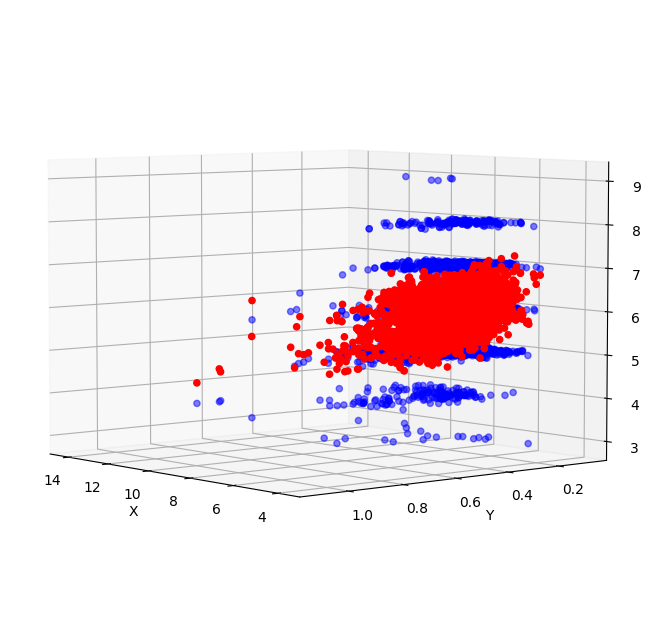

In [348]:
y_predictions = model(X, newTheta)
print(y_predictions)
x1, x2 = np.linspace(-2, 2, 1), np.linspace(-2, 2, 1)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y, color='b', alpha=0.5)
ax.scatter(x[:,0], x[:,1], y_predictions, color='r', alpha=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(5,-220)
plt.show()

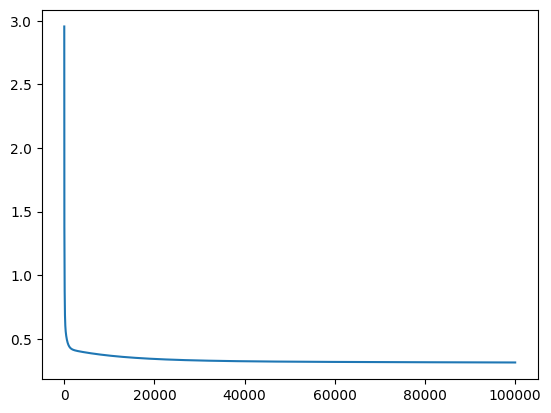

In [349]:
#on affiche la variation des couts au fil de la descente des gradients
plt.plot([i for i in range(100000)], varCout)

In [350]:
#on calcule le coefficient de prédiction, plus le chiffre est proche de 1, mieux la prédiction est fidèle à la réalité
#cependant, on constate que les prédictions sont assez fausses. En effet, on constate que les labels appartiennent plus à un ensemble discret, qu'à un ensembe réel
#Il est peut être préférable d'utiliser un algorithme de classification comme KNN (k-nearest neighbors) pour voir si les prédictions seront meilleurs
coeffPredictions_pol = coefDet(y, y_predictions)
print(coeffPredictions_pol)

0.19946380057806246


## Algorithme des KNN (Classifieur) pour prédire les labels du dataset

In [351]:
class KNN():
    """
    Implements the K-Nearest Neighbors (K-NN) algorithm.
    """
    
    
    def __init__(self, k=1, mode="classification"):
        """
        Constructor.
        
        Parameters
        ----------
        
        k : int
            Number of neighbors.
        mode : str
            Either "classification" or "regression"
        """
        
        self.k = k
        self.mode = mode
        self.X = []
        self.y = []
        
    def setK(self, newK):
        self.k = newK
        
    
    def fit(self, X, y):
        """
        Set the points X and their targets y as attributes of the class.
        In this way, X and y can be used in further methods.
        
        Parameters
        ----------
        X : ndarray
            Initial points of dim N x p.
        y : ndarray
            Targets of the initial points of dim N or (N x p').
        
        """
        
        self.X = X
        self.y = y
    
    
    def _get_distances_and_targets(self, x_new):
        """
        Given a new point, this function computes the distances and targets
        between the new point x_new and the points of X.
        The distances and targets are stored in a list of the form:
        
        dist_and_targets = [[d1, t1], [d2, t2], [d3, t3], ...
        
        where:
        - di is the distance between x_new and the i-th point of X;
        - t1 is the target of the i-th point of X.
        
        Afterwards, the pairs of dist_and_targets is sorted according 
        to their first elements and the k first elements selected.
        The distances of the k first elements of dist_and_targets
        form the list of distances to be returned.
        The targets of the k first elements of dist_and_targets
        form the list of targets to be returned.
        
        
        Parameters
        ----------
            New point of dim p to be classified by the K-NN algo.
            
        Returns
        -------
        dist, targets : list, list
            list of distances and list of targets associated with
            x_new and the initial points X.
            Cf. above documentation for further details.
        """
        
        listeDistancesAvecPoints = []
        
        #print(x_new)
        for i in range(len(self.X)):
            #on stocke la distance au carrée entre x_new et point
            #distanceCarreEntre2Points = (x_new[0] - x[0])**2 + (x_new[1] - x[1])**2
            distanceCarreEntre2Points = 0
            for j in range(len(self.X[i])):
                distanceCarreEntre2Points += (self.X[i][j] - x_new[j])**2
            distanceCarreEntre2Points = sqrt(distanceCarreEntre2Points)
            
            listeDistancesAvecPoints.append((distanceCarreEntre2Points, self.y[i]))
            
        #on trie de manière croissante cette liste de distances par rapport à la premiere valeur de chaque distance avec un point
        dist_and_targets = sorted(listeDistancesAvecPoints, key = lambda x : x[0])
        #print("Distances : " +str(np.array(listeDistancesAvecPoints).shape))
        distances = [x[0] for x in dist_and_targets[0:self.k]]
        targets = [x[1] for x in dist_and_targets[0:self.k]]
        return (distances, targets)
        
        
    def predict(self, x_new):
        """
        Computes the predictions associated to a new point x_new.
        The predictions are computed as follows:
        - compute the distances and targets between x_new and X using
          the method get_distances_and_targets.
        - In the classification mode, return the most common target 
          of this array of k elements.
        - In the regression mode, return the mean of the targets 
          of this array of k elements.
        
        Parameters
        ----------
        x_new : Union[ndarray, list]
            New point of dim p to be classified by the KNN algo.
            
        Returns
        -------
        y_new_hat : Union[int, float]
            Prediction for the point x_new (class or value).
        """
        
        x_predictions = []
        
        for x in x_new:
            #on prend les knn pour ce point
            knn = self._get_distances_and_targets(x)
            distances = knn[0]
            targets = list(knn[1])
            #print(targets[0], targets[1])
            
            if (self.mode == "classification"):
                dicoOccurencesClasses = {}
                for target in targets:
                    target = target[0]
                    #print(dicoOccurencesClasses, target)
                    if target in dicoOccurencesClasses:
                        dicoOccurencesClasses[target] += 1
                    else:
                        dicoOccurencesClasses[target] = 1
                        
                max_occurence_target = list(dicoOccurencesClasses.keys())[0]
                #print(dicoOccurencesClasses)
                for target in dicoOccurencesClasses.keys():
                    #print(max_occurence_target)
                    if dicoOccurencesClasses[target] > dicoOccurencesClasses[max_occurence_target]:
                        max_occurence_target = target
                
                x_predictions.append(max_occurence_target) 
            
            elif (self.mode == "regression"):
                return sum(target)/len(self.k)

        return x_predictions

In [352]:
#on divise les dataset x et y
x_train, x_test = X[:X.shape[0]//20], X[X.shape[0]//20:]
y_train, y_test = y[:y.shape[0]//20], y[y.shape[0]//20:]
y_train.shape, y_test.shape

((244, 1), (4654, 1))

In [353]:
k_lists = [i for i in range(1,100,1)]
liste_pourcentage_predictions = [None for i in range(1,100,1)]
#print(k_lists, liste_pourcentage_predictions)

#on créé notre modèle de knn (k-nearest neighbors)
knn =  KNN(k_lists[0]) 
knn.fit(x_train, y_train)

for i in range(len(k_lists)):
    #print(i)
    k = k_lists[i]
    knn.setK(k)
    
    #on prédit l'étiquette de chaque x_test en fonction des k plus proches voisins
    y_predict = knn.predict(x_test)
    
    #print(y_test)
    #print(y_predict)
    nb_bonnes_predict = 0
    #on calcule le pourcentage de bonne prédictions
    for j in range(len(y_test)):
        if (y_test[j] == y_predict[j]):
            nb_bonnes_predict += 1
            
    liste_pourcentage_predictions[i] = (nb_bonnes_predict/len(y_predict))*100
    #print("Accuracy : ", (nb_bonnes_predict/len(y_predict))*100)

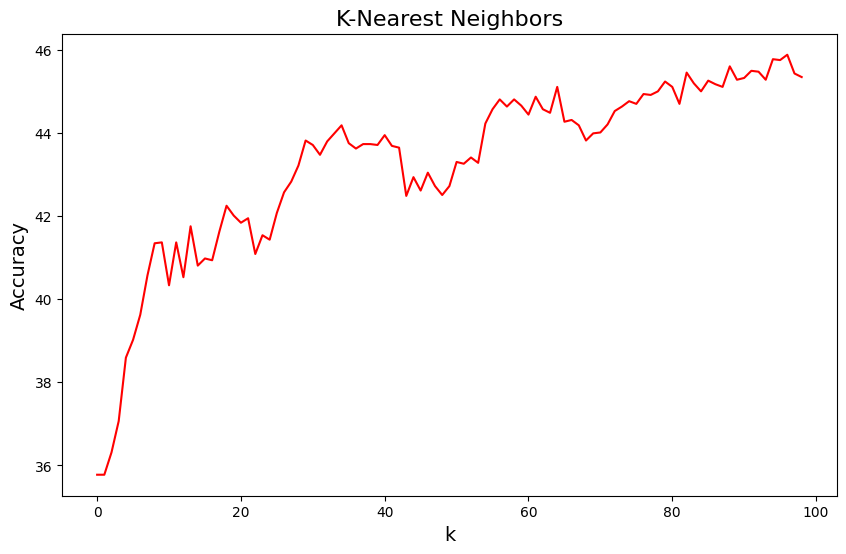

In [354]:
#on affiche sous forme d'une courbe l'évolution de l'erreur en fonction de k
plt.figure(figsize=(10, 6))
liste_pourcentage_predictions
plt.plot([i for i in range(len(liste_pourcentage_predictions))], liste_pourcentage_predictions, c='red')

plt.xlabel("k", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("K-Nearest Neighbors", fontsize=16)

# plt.savefig("knn.jpg")
plt.show()